<a href="https://colab.research.google.com/github/shwetaypatil/Handwritten_Digit_Recognition_model/blob/main/HandwrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
x_train = np.loadtxt('train_x.csv', delimiter = ",").T
y_train = np.loadtxt('train_label.csv', delimiter = ",").T

x_test = np.loadtxt('test_x.csv', delimiter = ",").T
y_test = np.loadtxt('test_label.csv', delimiter = ",").T

In [6]:
np.savetxt("train_x.csv", x_train, delimiter=",")
np.savetxt("train_label.csv", y_train, delimiter=",")
np.savetxt("test_x.csv", x_test, delimiter=",")
np.savetxt("test_label.csv", y_test, delimiter=",")

In [7]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (784, 1000)
Shape of y_train:  (10, 1000)
Shape of x_test:  (784, 350)
Shape of y_test:  (10, 350)


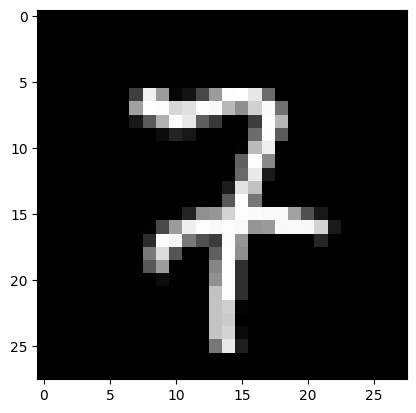

In [8]:
index = random.randrange(0, x_train.shape[1])
plt.imshow(x_train[:, index].reshape(28, 28), cmap='gray')
plt.show()

In [9]:
def tanh(x):
  return np.tanh(x)

def relu(x):
  return np.maximum(x, 0)

def softmax(x):
  shift_x = x - np.max(x, axis=0, keepdims=True) #for numerical stability
  expX = np.exp(shift_x)
  return expX / np.sum(expX, axis=0, keepdims=True)

In [10]:
def derivative_tanh(x):
  return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
  return np.array(x > 0, dtype=np.float32)


In [11]:
def initialize_parameters(n_x, n_h, n_y):
  w1 = np.random.randn(n_h, n_x)*0.01
  b1 = np.zeros((n_h, 1))

  w2 = np.random.randn(n_y, n_h)*0.01
  b2 = np.zeros((n_y, 1))

  parameters = {
      "w1": w1,
      "b1": b1,
      "w2": w2,
      "b2": b2
  }

  return parameters

In [12]:
def forward_propagation(x, parameters):
  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']

  z1 = np.dot(w1, x) + b1
  a1 = tanh(z1)

  z2 = np.dot(w2, a1) + b2
  a2 = softmax(z2)

  forward_cache = {
      "z1": z1,
      "a1": a1,
      "z2": z2,
      "a2": a2
  }

  return forward_cache

In [13]:
#cost function
def cost_function(a2, y):
  m = y.shape[1]

  epsilon = 1e-8 #small value to avoid log(0)
  cost  = -(1/m)*np.sum(y*np.log(a2))
  # cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))

  return cost

In [14]:
def back_propagation(x, y, parameters, forward_cache):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    a1 = forward_cache['a1']
    a2 = forward_cache['a2']

    m = x.shape[1]

    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)

    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }

    return gradients

In [15]:
def update_parameters(parameters, gradients, learning_rate):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters

In [16]:
#complete model
def model(x, y, n_h, learning_rate, iterations):
  n_x = x.shape[0]
  n_y = y.shape[0]

  cost_list = []

  parameters = initialize_parameters(n_x, n_h, n_y)

  for i in range(iterations):
    forward_cahe = forward_propagation(x, parameters)
    cost = cost_function(forward_cahe['a2'], y)
    gradients = back_propagation(x, y, parameters, forward_cahe)
    parameters = update_parameters(parameters, gradients, learning_rate)

    cost_list.append(cost)
    if i%(iterations/10) == 0:
      print("Cost after ", i, "iterations is", cost)


  return parameters, cost_list

In [24]:
iterations = 500
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = model(x_train, y_train, n_h=n_h, learning_rate=learning_rate, iterations=iterations)

Cost after  0 iterations is 2.3302218812912323
Cost after  50 iterations is 0.49371428270253753
Cost after  100 iterations is 0.31912735246605156
Cost after  150 iterations is 0.23706845653086311
Cost after  200 iterations is 0.18644488483341576
Cost after  250 iterations is 0.1516429237773927
Cost after  300 iterations is 0.12632352266196958
Cost after  350 iterations is 0.10724105295668562
Cost after  400 iterations is 0.09249418609070376
Cost after  450 iterations is 0.0808746541322812


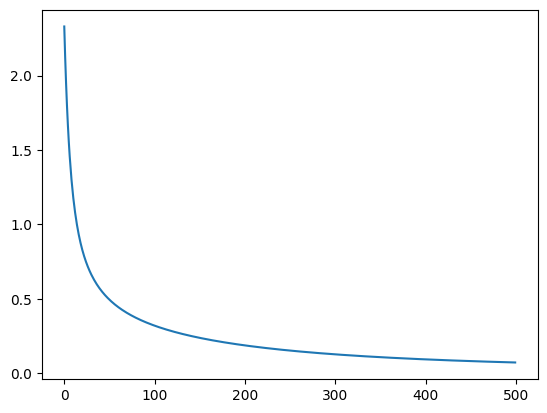

In [25]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [26]:
def accuracy(inp, labels, parameters):
  forward_cache = forward_propagation(inp, parameters)
  a_out = forward_cache['a2'] #contains probabilities with shape(10, 1)

  a_out = np.argmax(a_out, 0) #0 represents row wise

  labels = np.argmax(labels, 0)
  acc = np.mean(a_out == labels)*100
  return acc

In [27]:
print("Accuracy of Train dataset", accuracy(x_train, y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(x_test, y_test, Parameters), 2), "%")

Accuracy of Train dataset 99.9 %
Accuracy of Test Dataset 86.0 %


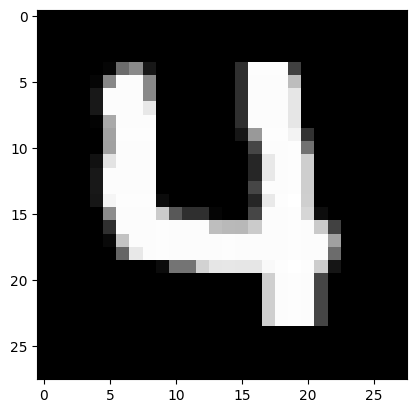

Our model says it is:  4


In [34]:
index = random.randrange(0, x_test.shape[1])
plt.imshow(x_test[:, index].reshape(28, 28), cmap='gray')
plt.show()

cache = forward_propagation(x_test[:, index].reshape(x_test[:, index].shape[0], 1), Parameters)
a_pred = cache['a2']
a_pred = np.argmax(a_pred, 0)

print("Our model says it is: ", a_pred[0])